In [1]:
import sys
sys.path.append('..')

from Controllers.ILQG_Gravity import  *

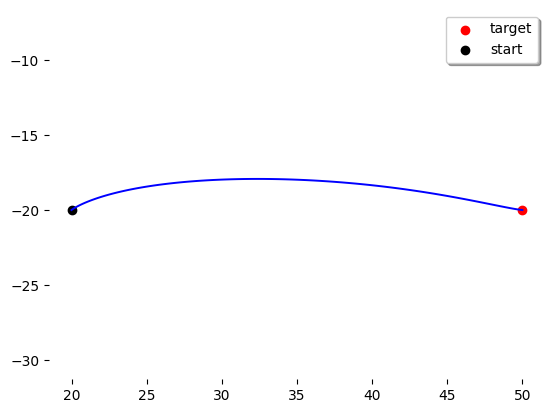

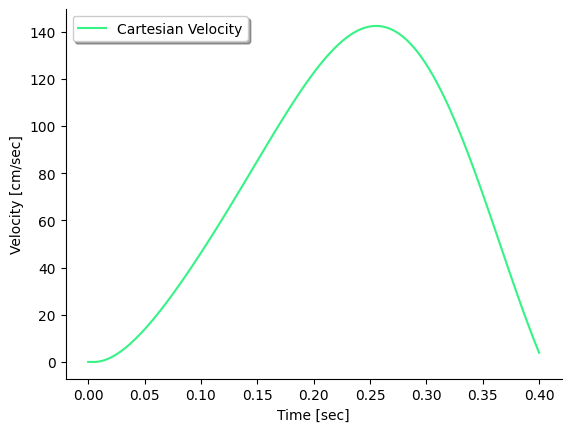

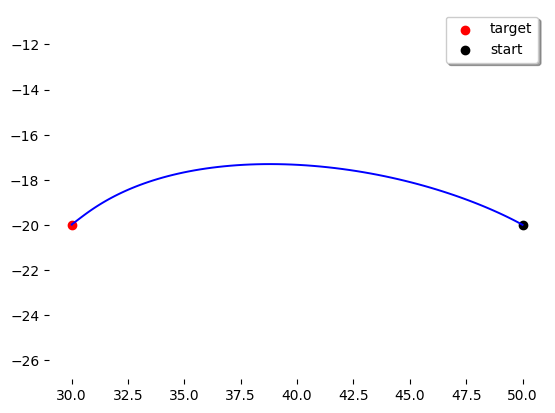

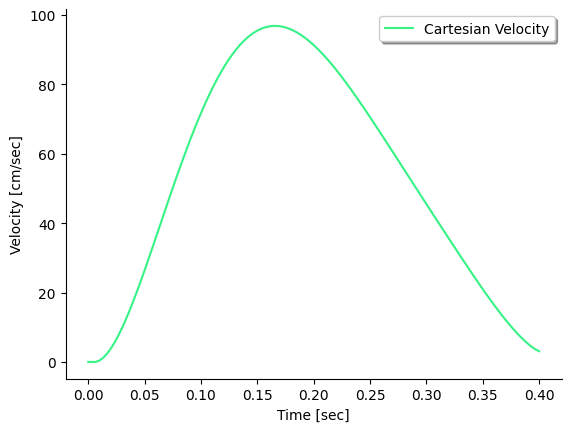

In [2]:
x=ILQG(Duration =  .4,start = [20,-20],targets=[50,-20],K = 120,Noise = False,r1 = 1e-1)[3]

x=ILQG(Duration = .4,start = [50,-20],targets=[30,-20],K = 120,Noise = False,r1 = 1e-1)[3]

In [3]:
def compute_h(x, y, l1, l2):
    """
    Computes h1 using the given equation.

    Parameters:
        x (float): x-coordinate of the end effector.
        y (float): y-coordinate of the end effector.
        l1 (float): Length of the first link.
        l2 (float): Length of the second link.

    Returns:
        h1 (float): Computed angle in radians.
    """


    # Compute the second term: arccos formula
    r_squared = x**2 + y**2


    # Final h1 calculation
    h1 = np.arctan2(y, x) - np.arccos((r_squared + l1**2 - l2**2) / (2 * l1 * np.sqrt(r_squared)))


    # Compute h2
    h2 = np.pi - np.arccos((l1**2 + l2**2 - r_squared) / (2 * l1 * l2))
    return h1,h2

# Example usage
x, y = -40,-30   # Position of the end effector
l1, l2 = 30, 33  # Link lengths

h1,h2 = compute_h(x, y, l1, l2)
print(h1/pi*180,h2/pi*180)
print(l1*np.cos(h1)+l2*np.cos(h1+h2))
print(l1*np.sin(h1)+l2*np.sin(h1+h2))

-182.74627101775263 75.04378549411194
-40.0
-30.000000000000004


d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG_Gravity.py:147: RuntimeWarning: overflow encountered in scalar multiply
  -x[3] * (2 * x[2] + x[3]) * a2 * np.sin(x[1]),
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG_Gravity.py:148: RuntimeWarning: overflow encountered in scalar power
  x[2] ** 2 * a2 * np.sin(x[1])
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG_Gravity.py:161: RuntimeWarning: invalid value encountered in matmul
  theta = Minv @ (x[4:6] - Bvisc @ x[2:4] - C - G)
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG_Gravity.py:78: RuntimeWarning: overflow encountered in scalar multiply
  -dtheta2 * (2 * dtheta1 + dtheta2) * a2 * np.sin(theta2),
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG_Gravity.py:79: RuntimeWarning: overflow encountered in scalar power
  dtheta1**2 * a2 * np.sin(theta2)
d:\thyriona\Desktop\Codes\FL\PhD\CurrentParts\..\Controllers\ILQG_Gravity.py:83: RuntimeWarning

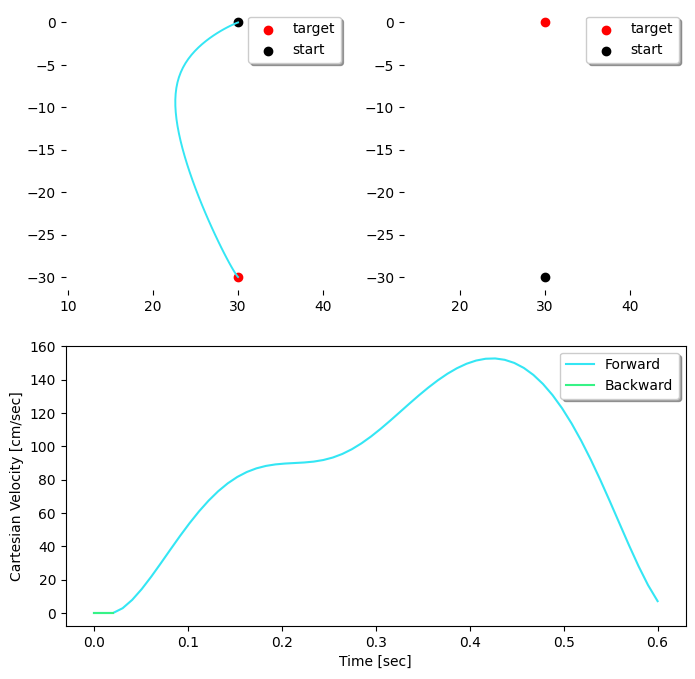

In [3]:
import matplotlib.gridspec as gridspec

St = [30,0]
Tg = [30,-30]
K = 60
X,Y,_,x = ILQG(Duration = .6,start = St,targets=Tg,K = K,Noise = False,r1 = 1e-2,plot = False)
fig = plt.figure(figsize = (8,8))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

ax1.plot(X, Y, linewidth=1.4, color="#34e6f4")
ax1.scatter([Tg[0]], [Tg[1]], color="red",label = "target")
ax1.scatter([X[0]], [Y[0]], color="black",label = "start")
ax1.axis("equal")
for side in ["left","right","bottom","top"] : ax1.spines[side].set_visible(False)   
ax1.legend(frameon = True,shadow = True,fancybox = True)
V = Compute_Cartesian_Speed(X,Y,.4/K)

ax3.plot(np.linspace(0,.6,K),V, label = "Forward",color = "#34e6f4")

X,Y,_,x=ILQG(Duration = .6,start = Tg,targets=St,K = K,Noise = False,r1 = 1e-2,plot = False)

ax2.plot(X, Y, linewidth=1.4, color="#36f386")
ax2.scatter([St[0]], [St[1]], color="red",label = "target")
ax2.scatter([X[0]], [Y[0]], color="black",label = "start")
ax2.axis("equal")
for side in ["left","right","bottom","top"] : ax2.spines[side].set_visible(False)   
ax2.legend(frameon = True,shadow = True,fancybox = True)
V = Compute_Cartesian_Speed(X,Y,.4/K)

ax3.plot(np.linspace(0,.6,K),V, label = "Backward",color = "#36f386")
ax3.set_ylabel("Cartesian Velocity [cm/sec]")
ax3.set_xlabel("Time [sec]")
ax3.legend(frameon = True,shadow = True,fancybox = True)

plt.savefig("DownUp4.pdf",dpi = K)
plt.show()


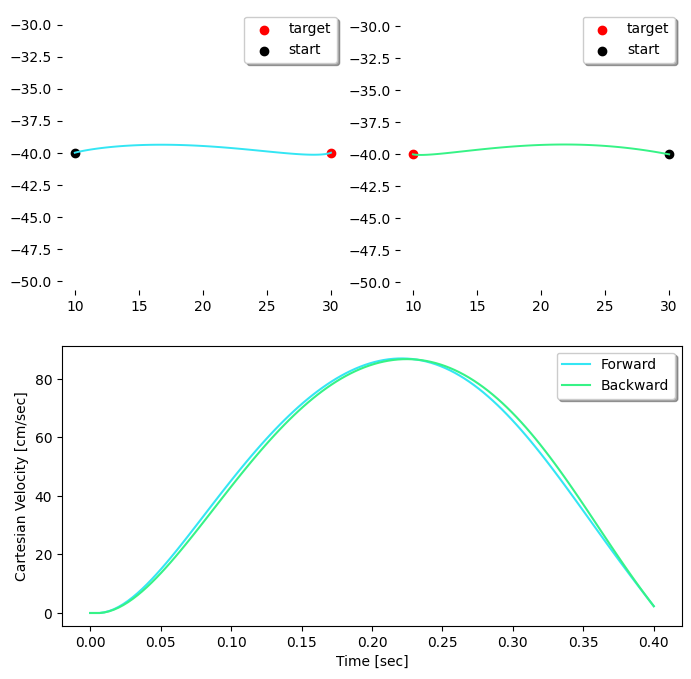

In [5]:
import matplotlib.gridspec as gridspec
St = [10,-40]
Tg = [30,-40]

X,Y,_,x = ILQG(Duration = .4,start = St,targets=Tg,K = 120,Noise = False,r1 = 1e-2,plot = False)
fig = plt.figure(figsize = (8,8))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

ax1.plot(X, Y, linewidth=1.4, color="#34e6f4")
ax1.scatter([Tg[0]], [Tg[1]], color="red",label = "target")
ax1.scatter([X[0]], [Y[0]], color="black",label = "start")
ax1.axis("equal")
for side in ["left","right","bottom","top"] : ax1.spines[side].set_visible(False)   
ax1.legend(frameon = True,shadow = True,fancybox = True)
V = Compute_Cartesian_Speed(X,Y,.4/120)

ax3.plot(np.linspace(0,.4,120),V, label = "Forward",color = "#34e6f4")

X,Y,_,x=ILQG(Duration = .4,start = Tg,targets=St,K = 120,Noise = False,r1 = 1e-2,plot = False)

ax2.plot(X, Y, linewidth=1.4, color="#36f386")
ax2.scatter([St[0]], [St[1]], color="red",label = "target")
ax2.scatter([X[0]], [Y[0]], color="black",label = "start")
ax2.axis("equal")
for side in ["left","right","bottom","top"] : ax2.spines[side].set_visible(False)   
ax2.legend(frameon = True,shadow = True,fancybox = True)
V = Compute_Cartesian_Speed(X,Y,.4/120)

ax3.plot(np.linspace(0,.4,120),V, label = "Backward",color = "#36f386")
ax3.set_ylabel("Cartesian Velocity [cm/sec]")
ax3.set_xlabel("Time [sec]")
ax3.legend(frameon = True,shadow = True,fancybox = True)

plt.savefig("FwBw2.pdf",dpi = K)
plt.show()